### 2. Importing Required Packages
#### These packages provide the essential tools for handling, cleaning, transforming, and analyzing the dataset.


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### 2. Loading dataset
#### The file is xls so we use read_excel function


In [41]:
data = pd.read_excel('titanic.xls')

#### exploring data


In [43]:
#number of columns and lines
data.shape


(1309, 14)

In [45]:
#show rows names
data.columns


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

### 3. Deletion of non representative rows 
##### name ticket cabin and home.dest are not important 
##### boat column could give a direct information about survival passengers--> leaking the target 



In [47]:
data=data.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)



In [49]:
data.head()


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


### 4. deleting duplicates



In [51]:
data = data.drop_duplicates()


In [53]:
data.shape

(1114, 8)

In [55]:
#counting befor imputation
data.describe().loc[["count"]]

,pclass,survived,age,sibsp,parch,fare
count,1114.0,1114.0,974.0,1114.0,1114.0,1113.0


#### importing transformers for imputation standardisation and PCA analysis


In [57]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 5. Imputation
#### using mean for numerical data and mode for categorical data


In [58]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = data.select_dtypes(include=["object"]).columns

In [61]:
data[num_cols] = SimpleImputer(strategy="mean").fit_transform(data[num_cols])
data[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(data[cat_cols])


In [63]:
data.describe().loc[["count"]]

,pclass,survived,age,sibsp,parch,fare
count,1114.0,1114.0,1114.0,1114.0,1114.0,1114.0



##### Plot histogram befor standarscaler transformation


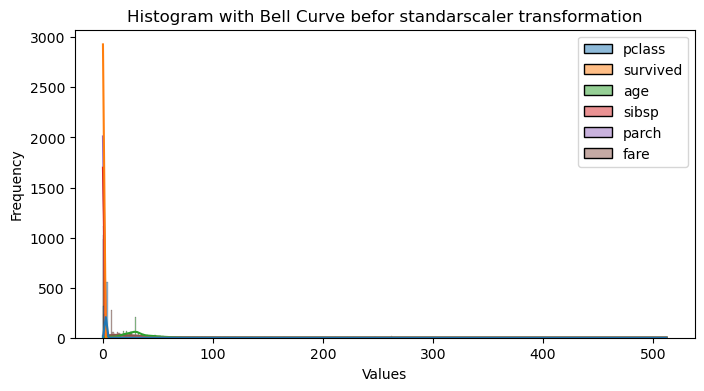

In [69]:
plt.figure(figsize=(8,4))
sns.histplot(data, kde=True)
plt.title("Histogram with Bell Curve befor standarscaler transformation")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

### 5. Normalisation
#### using standardscaler


In [71]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])  # only numerical



##### Plot histogram after standarscaler transformation


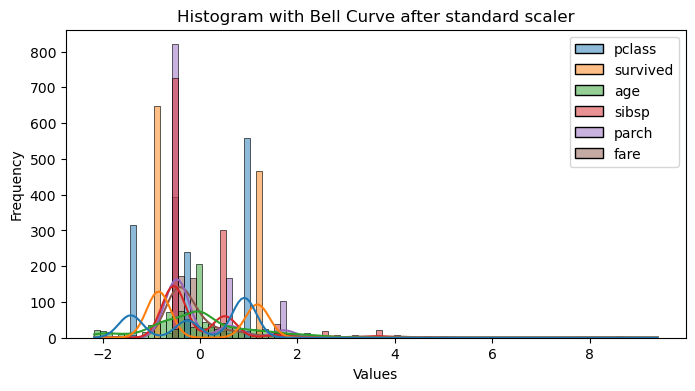

In [73]:
plt.figure(figsize=(8,4))
sns.histplot(data, kde=True)
plt.title("Histogram with Bell Curve after standard scaler")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

### 5. PCA
#### Principal Component Analysis


In [75]:
#  PCA 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[num_cols])

data["PC1"] = pca_data[:, 0]
data["PC2"] = pca_data[:, 1]



In [77]:
#Resulting Dataset after PCA
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,PC1,PC2
0,-1.422669,1.177047,female,-0.079154,-0.540006,-0.474709,3.175403,S,-3.118707,0.318147
1,-1.422669,1.177047,male,-2.119941,0.508020,1.719590,2.088468,S,-1.764542,2.832890
2,-1.422669,-0.849584,female,-2.041219,0.508020,1.719590,2.088468,S,-1.080642,2.500769
3,-1.422669,-0.849584,male,-0.006485,0.508020,1.719590,2.088468,S,-1.829928,1.693072
4,-1.422669,-0.849584,female,-0.369830,0.508020,1.719590,2.088468,S,-1.696127,1.837304
